### Project = online retail dataset with k -means and Hierarchical clustering

#### RFM stands for Recency, Frequency, and Monetary. RFM is a simple but effective method that can be applied to market segmentation. RFM analysis is used to analyze customer’s behavior which consists of how recently the customers have purchased (recency), how often customer’s purchases (frequency), and how much money customers spend (monetary)

# case study- online retail models use like
- EDA
- clustering= 
- 1)k-means
- 2)Hierarchical

In [141]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
import missingno as msno

In [142]:
df=pd.read_csv(r"C:\Users\hp\Desktop\python\ml project class\clustering final project\OnlineRetail.csv",encoding= 'unicode_escape')
df.head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01-12-2010 08:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01-12-2010 08:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,01-12-2010 08:26,7.65,17850.0,United Kingdom
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,01-12-2010 08:26,4.25,17850.0,United Kingdom
7,536366,22633,HAND WARMER UNION JACK,6,01-12-2010 08:28,1.85,17850.0,United Kingdom
8,536366,22632,HAND WARMER RED POLKA DOT,6,01-12-2010 08:28,1.85,17850.0,United Kingdom
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,01-12-2010 08:34,1.69,13047.0,United Kingdom


In [143]:
df.tail()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,09-12-2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,09-12-2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,09-12-2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,09-12-2011 12:50,4.15,12680.0,France
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,09-12-2011 12:50,4.95,12680.0,France


### data preprocessing

In [144]:
df.CustomerID.value_counts()

17841.0    7983
14911.0    5903
14096.0    5128
12748.0    4642
14606.0    2782
           ... 
15070.0       1
15753.0       1
17065.0       1
16881.0       1
16995.0       1
Name: CustomerID, Length: 4372, dtype: int64

In [145]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [146]:
df.CustomerID.value_counts()

17841.0    7983
14911.0    5903
14096.0    5128
12748.0    4642
14606.0    2782
           ... 
15070.0       1
15753.0       1
17065.0       1
16881.0       1
16995.0       1
Name: CustomerID, Length: 4372, dtype: int64

In [147]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [148]:
df.shape

(541909, 8)

In [149]:
df.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

In [150]:
df.dtypes

InvoiceNo       object
StockCode       object
Description     object
Quantity         int64
InvoiceDate     object
UnitPrice      float64
CustomerID     float64
Country         object
dtype: object

In [151]:
# df['CustomerID']=df['CustomerID'].astype(str)

In [152]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01-12-2010 08:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01-12-2010 08:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01-12-2010 08:26,3.39,17850.0,United Kingdom


In [153]:
#### to remove missing values
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [154]:
df = df.dropna()

In [155]:
df.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

<Axes: >

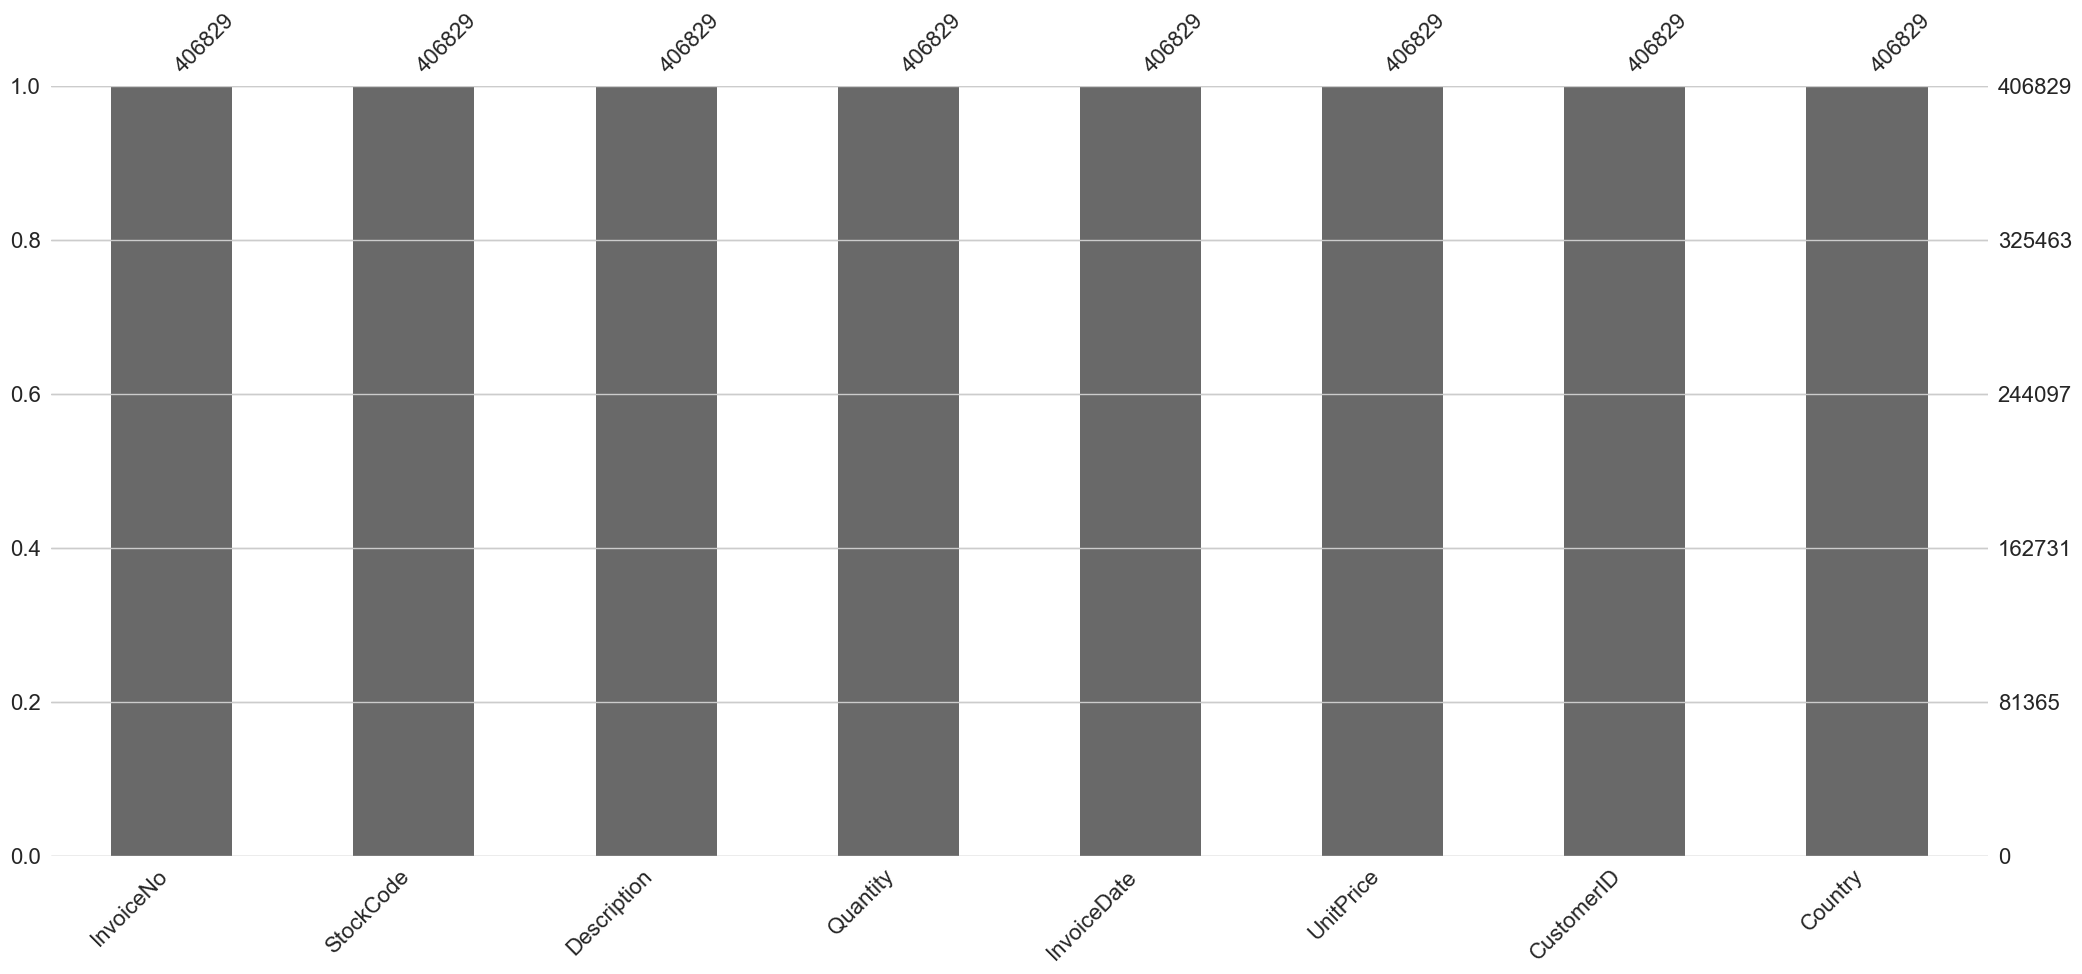

In [156]:
msno.bar(df)

- Now we can see above that the matrix is showing all bars are equal
- meaning that the data is clean and ready to be used in the model

<Axes: >

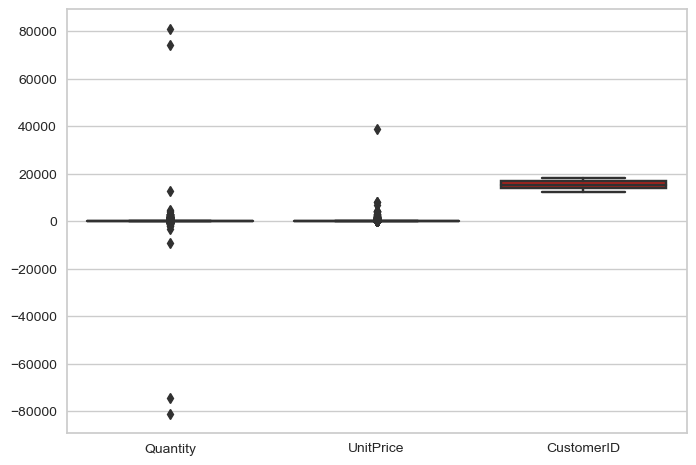

In [157]:
### to check outliers
import seaborn as sns
sns.boxplot(data=df)

In [158]:
### to remove outliers
for i in df:                  
    if df[i].dtypes in ("float64","int64"):
        q1 = df[i].quantile(0.25)  
        q3 = df[i].quantile(0.75)  
        iqr = q3-q1
        ul = q3 + 1.5*iqr 
        ll = q1 - 1.5*iqr 
        df[i].clip(upper=ul,lower=ll,inplace=True)

<Axes: >

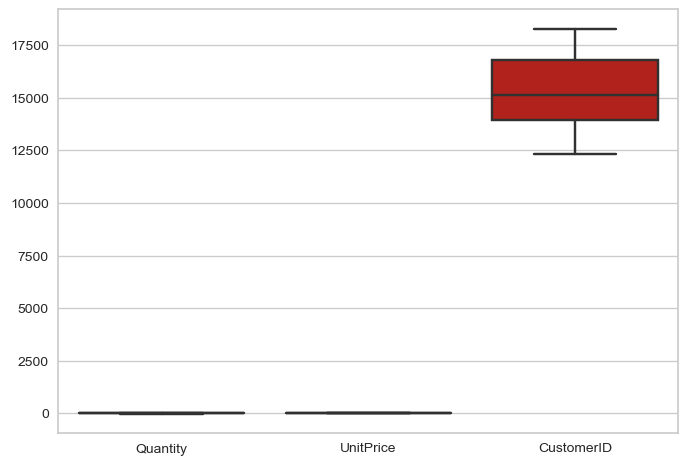

In [159]:
import seaborn as sns
sns.boxplot(data=df)

- we also create a new field
- 1.amount
- 2.Number of Transactons
- 3.Last Transactions(how many days ago was that customer's last transaction)

#### prepare the for model 

- R (Recency): Number of days since last purchase
- F (Frequency): Number of tracsactions
- M (Monetary): Total amount of transactions (revenue contributed)

In [160]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'], format='%d-%m-%Y %H:%M')

In [161]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


# Amount

In [162]:
df['total Amount Spent']= df['Quantity'] * df['UnitPrice']
Total_Amount = df['total Amount Spent'].groupby(df['CustomerID']).sum()
Total_Amount = pd.DataFrame(Total_Amount).reset_index()
Total_Amount.head()

,CustomerID,total Amount Spent
0,12346.0,14.56
1,12347.0,3877.44
2,12348.0,557.57
3,12349.0,1336.65
4,12350.0,301.90


# Number Of Transactions

In [163]:
transactions = df['InvoiceNo'].groupby(df['CustomerID']).count()
transaction = pd.DataFrame(transactions).reset_index()
transaction.head()

,CustomerID,InvoiceNo
0,12346.0,2
1,12347.0,182
2,12348.0,31
3,12349.0,73
4,12350.0,17


# Last transaction(LT)

In [164]:
final = df['InvoiceDate'].max()
df['Last_transact'] = final - df['InvoiceDate']
LT = df.groupby(df['CustomerID']).min()['Last_transact']
LT = pd.DataFrame(LT).reset_index()
LT.head()

,CustomerID,Last_transact
0,12346.0,325 days 02:33:00
1,12347.0,1 days 20:58:00
2,12348.0,74 days 23:37:00
3,12349.0,18 days 02:59:00
4,12350.0,309 days 20:49:00


# merging all the newly created columns 

In [165]:
df_new = pd.merge(Total_Amount,transaction, how='inner', on='CustomerID')

In [166]:
df_new = pd.merge(df_new, LT, how='inner', on='CustomerID')

In [167]:
df_new.head()

,CustomerID,total Amount Spent,InvoiceNo,Last_transact
0,12346.0,14.56,2,325 days 02:33:00
1,12347.0,3877.44,182,1 days 20:58:00
2,12348.0,557.57,31,74 days 23:37:00
3,12349.0,1336.65,73,18 days 02:59:00
4,12350.0,301.90,17,309 days 20:49:00


In [168]:
#Last Transact column still needs to be simplified for just number of days
df_new['Last_transact'] = df_new['Last_transact'].dt.days

In [169]:
df_new.head()

,CustomerID,total Amount Spent,InvoiceNo,Last_transact
0,12346.0,14.56,2,325
1,12347.0,3877.44,182,1
2,12348.0,557.57,31,74
3,12349.0,1336.65,73,18
4,12350.0,301.90,17,309


# Now go for model
- 1)k-means clustering

In [170]:
#Scaling the data
from sklearn.preprocessing import StandardScaler

In [171]:
scaler=StandardScaler()

In [172]:
x=scaler.fit_transform(df_new)

In [173]:
x

array([[-1.71506707, -0.38678366, -0.3917197 ,  2.32202285],
       [-1.71448641,  0.73563145,  0.38265697, -0.89373323],
       [-1.71390576, -0.22900433, -0.26695902, -0.1691956 ],
       ...,
       [ 1.73169966, -0.34757201, -0.34439668, -0.83418219],
       [ 1.73228032,  0.21393483,  2.85205812, -0.87388289],
       [ 1.73460294,  0.05071032, -0.0991774 , -0.48680114]])

In [174]:
df_new.head()

,CustomerID,total Amount Spent,InvoiceNo,Last_transact
0,12346.0,14.56,2,325
1,12347.0,3877.44,182,1
2,12348.0,557.57,31,74
3,12349.0,1336.65,73,18
4,12350.0,301.90,17,309


# Elbow Method to decide how many Clusters to chose!
*  It is difficult to predict the right number of clusters that we should opt for 
*  We can do this Elbow method to get the right number of clusters
*  After performing this we might add or reduce the number of clusters based on how much error we are reducing by increasing the clusters!

In [175]:
#importing Libraries for clustering
from sklearn.cluster import KMeans

In [176]:
# Checking for number of cluster
wcss=[]

for k in range(1,11):
    kmeans=KMeans(n_clusters=k, init='k-means++', random_state=0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

In [177]:
wcss

[17488.000000000004,
 13258.361287824991,
 9649.88781313173,
 7064.833436559198,
 5725.953380257283,
 4853.818439979422,
 4167.714930743231,
 3787.60199168073,
 3397.630699268991,
 3133.8830006574926]

In [178]:
kmeans.labels_

array([3, 0, 0, ..., 9, 8, 9])

Text(0.5, 1.0, 'The Elbow Method')

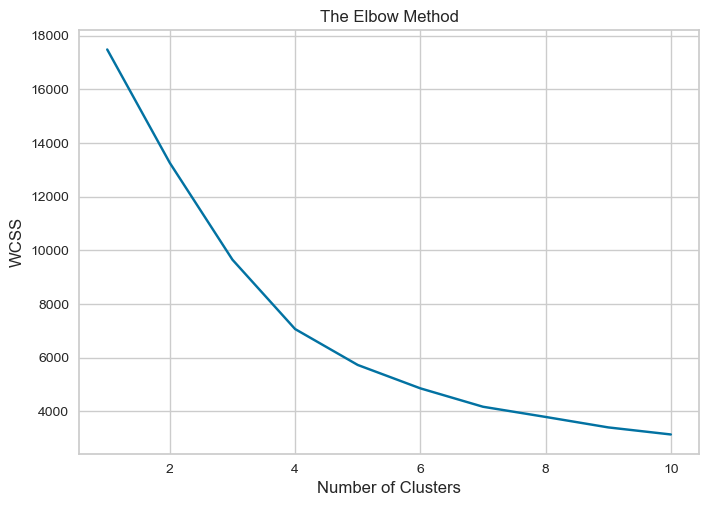

In [179]:
plt.plot(range(1,11), wcss)
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('The Elbow Method')

#### It is evident that k=3 will form the elbow, either optimal number of clusters is 3.

In [180]:
# for k equals 3
kmeans=KMeans(n_clusters=3, init='k-means++', random_state=0)
y_kmeans=kmeans.fit_predict(x)

In [181]:
df_new['cluster']=y_kmeans

In [182]:
df_new.head()

,CustomerID,total Amount Spent,InvoiceNo,Last_transact,cluster
0,12346.0,14.56,2,325,2
1,12347.0,3877.44,182,1,0
2,12348.0,557.57,31,74,0
3,12349.0,1336.65,73,18,0
4,12350.0,301.90,17,309,2


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


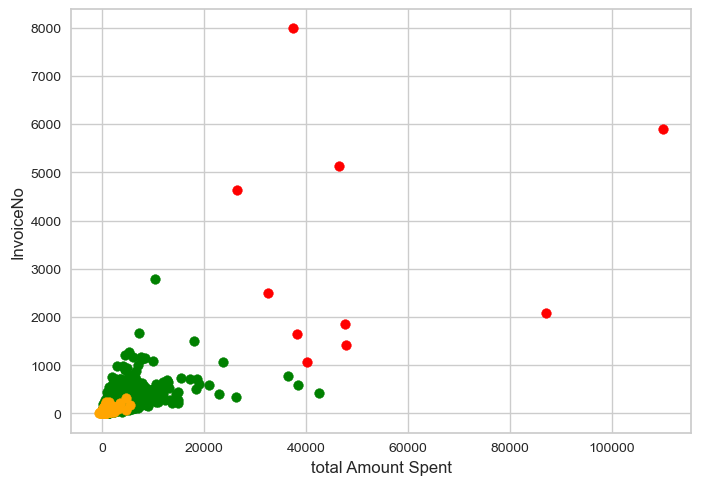

In [183]:
df_new1=df_new[df_new.cluster==0]
df_new2=df_new[df_new.cluster==1]
df_new3=df_new[df_new.cluster==2]
# retail4=retail[retail.cluster==3]


plt.scatter(df_new1['total Amount Spent'], df_new1["InvoiceNo"], color='green')
plt.scatter(df_new2['total Amount Spent'], df_new2["InvoiceNo"], color='red')
plt.scatter(df_new3['total Amount Spent'], df_new3["InvoiceNo"], color='orange')
# plt.scatter(retail4['Amount'], retail4["Frequency"], color='blue')


plt.xlabel('total Amount Spent')
plt.ylabel("InvoiceNo")
plt.legend()

<Axes: xlabel='cluster', ylabel='total Amount Spent'>

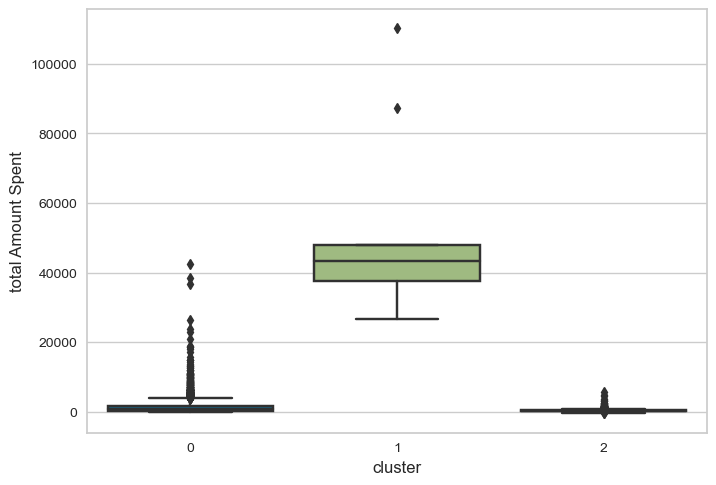

In [184]:
sns.boxplot(x='cluster', y='total Amount Spent', data=df_new)

<Axes: xlabel='cluster', ylabel='InvoiceNo'>

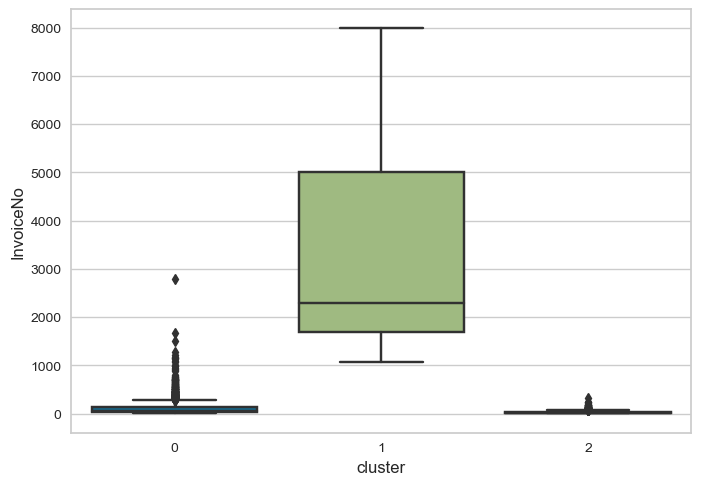

In [185]:
sns.boxplot(x='cluster', y='InvoiceNo', data=df_new)

<Axes: xlabel='cluster', ylabel='Last_transact'>

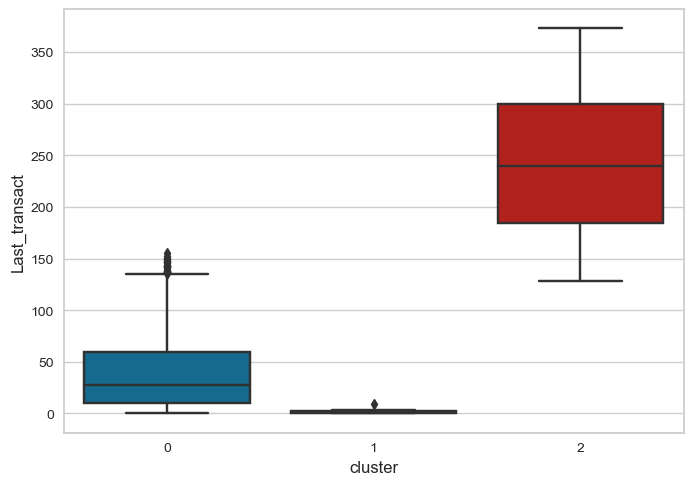

In [186]:
sns.boxplot(x='cluster', y='Last_transact', data=df_new)

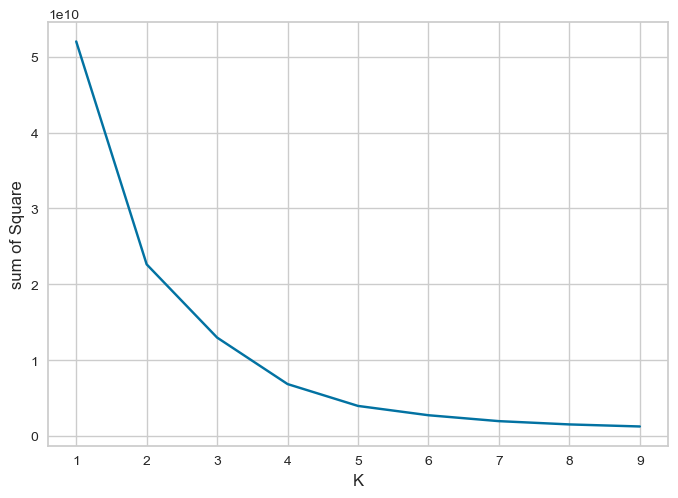

In [187]:
k_rng=range(1,10)
sse=[]
for k in k_rng:
    km=KMeans(n_clusters=k)
    km.fit(df_new[['total Amount Spent','InvoiceNo']])
    sse.append(km.inertia_)
    
plt.xlabel('K')
plt.ylabel("sum of Square")
plt.plot(k_rng,sse)

In [188]:
# Silhouette analysis
from sklearn.metrics import silhouette_score
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]

for num_clusters in range_n_clusters:
    
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(x)
    
    cluster_labels = kmeans.labels_
    
    # silhouette score
    silhouette_avg = silhouette_score(x, cluster_labels)
    print("For n_clusters={0}, the silhouette score is {1}".format(num_clusters, silhouette_avg))

For n_clusters=2, the silhouette score is 0.8902273176362434
For n_clusters=3, the silhouette score is 0.37244057035669387
For n_clusters=4, the silhouette score is 0.38495435330767946
For n_clusters=5, the silhouette score is 0.3977458464094971
For n_clusters=6, the silhouette score is 0.4007356143918374
For n_clusters=7, the silhouette score is 0.39600396921398345
For n_clusters=8, the silhouette score is 0.3270323834693963


# Business Submission

In [199]:
Submission = df_new.loc[:,['CustomerID','cluster']]
Submission

,CustomerID,cluster
0,12346.0,2
1,12347.0,0
2,12348.0,0
3,12349.0,0
4,12350.0,2
...,...,...
4367,18280.0,2
4368,18281.0,2
4369,18282.0,0
4370,18283.0,0


# 2nd model we apply
- h-clustering model

In [189]:
# Hierarchy clustering
from sklearn.cluster import AgglomerativeClustering

In [190]:
agg=AgglomerativeClustering(n_clusters=3, linkage='single').fit(df_new)

In [191]:
agg.labels_

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [192]:
x

array([[-1.71506707, -0.38678366, -0.3917197 ,  2.32202285],
       [-1.71448641,  0.73563145,  0.38265697, -0.89373323],
       [-1.71390576, -0.22900433, -0.26695902, -0.1691956 ],
       ...,
       [ 1.73169966, -0.34757201, -0.34439668, -0.83418219],
       [ 1.73228032,  0.21393483,  2.85205812, -0.87388289],
       [ 1.73460294,  0.05071032, -0.0991774 , -0.48680114]])

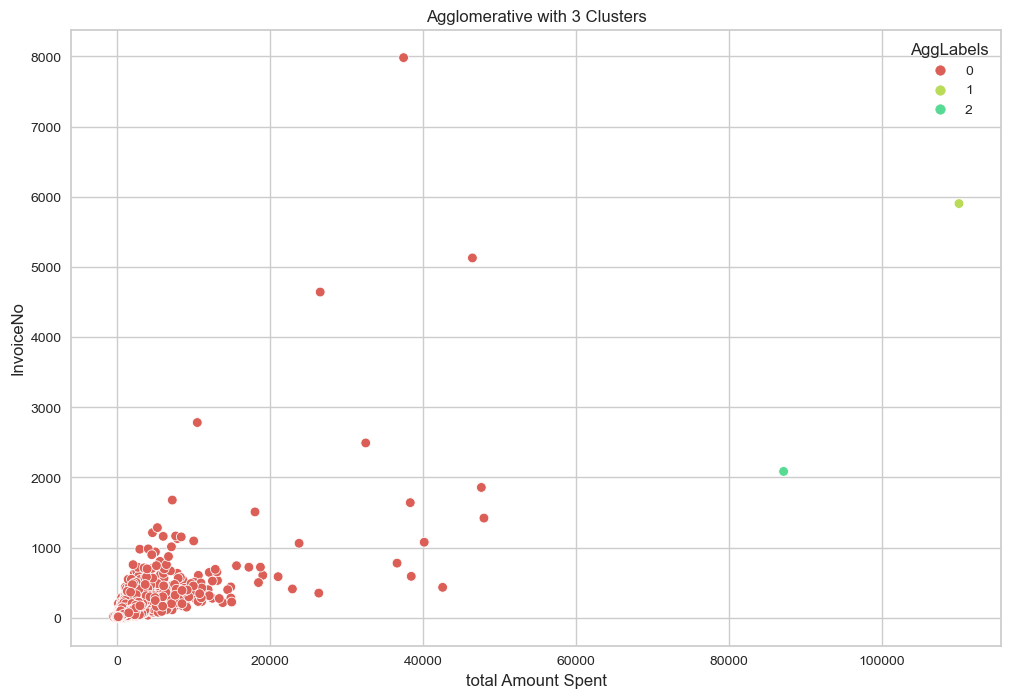

In [193]:
df_new['AggLabels'] = agg.labels_
plt.figure(figsize=(12, 8))
sns.scatterplot(x=df_new['total Amount Spent'], y=df_new['InvoiceNo'], hue=df_new['AggLabels'], 
                palette=sns.color_palette('hls', 5))
plt.title('Agglomerative with 3 Clusters')
plt.show()

In [194]:
from scipy.cluster import hierarchy 
from scipy.spatial import distance_matrix 

dist = distance_matrix(x, x)
print(dist)

[[0.         3.49293034 2.49932595 ... 4.67392856 5.74290647 4.47958673]
 [3.49293034 0.         1.37021101 ... 3.6853333  4.27208431 3.57254704]
 [2.49932595 1.37021101 0.         ... 3.51204482 4.72199594 3.47843017]
 ...
 [4.67392856 3.6853333  3.51204482 ... 0.         3.24564165 0.58261766]
 [5.74290647 4.27208431 4.72199594 ... 3.24564165 0.         2.98098491]
 [4.47958673 3.57254704 3.47843017 ... 0.58261766 2.98098491 0.        ]]


In [195]:
Z = hierarchy.linkage(dist, 'complete')

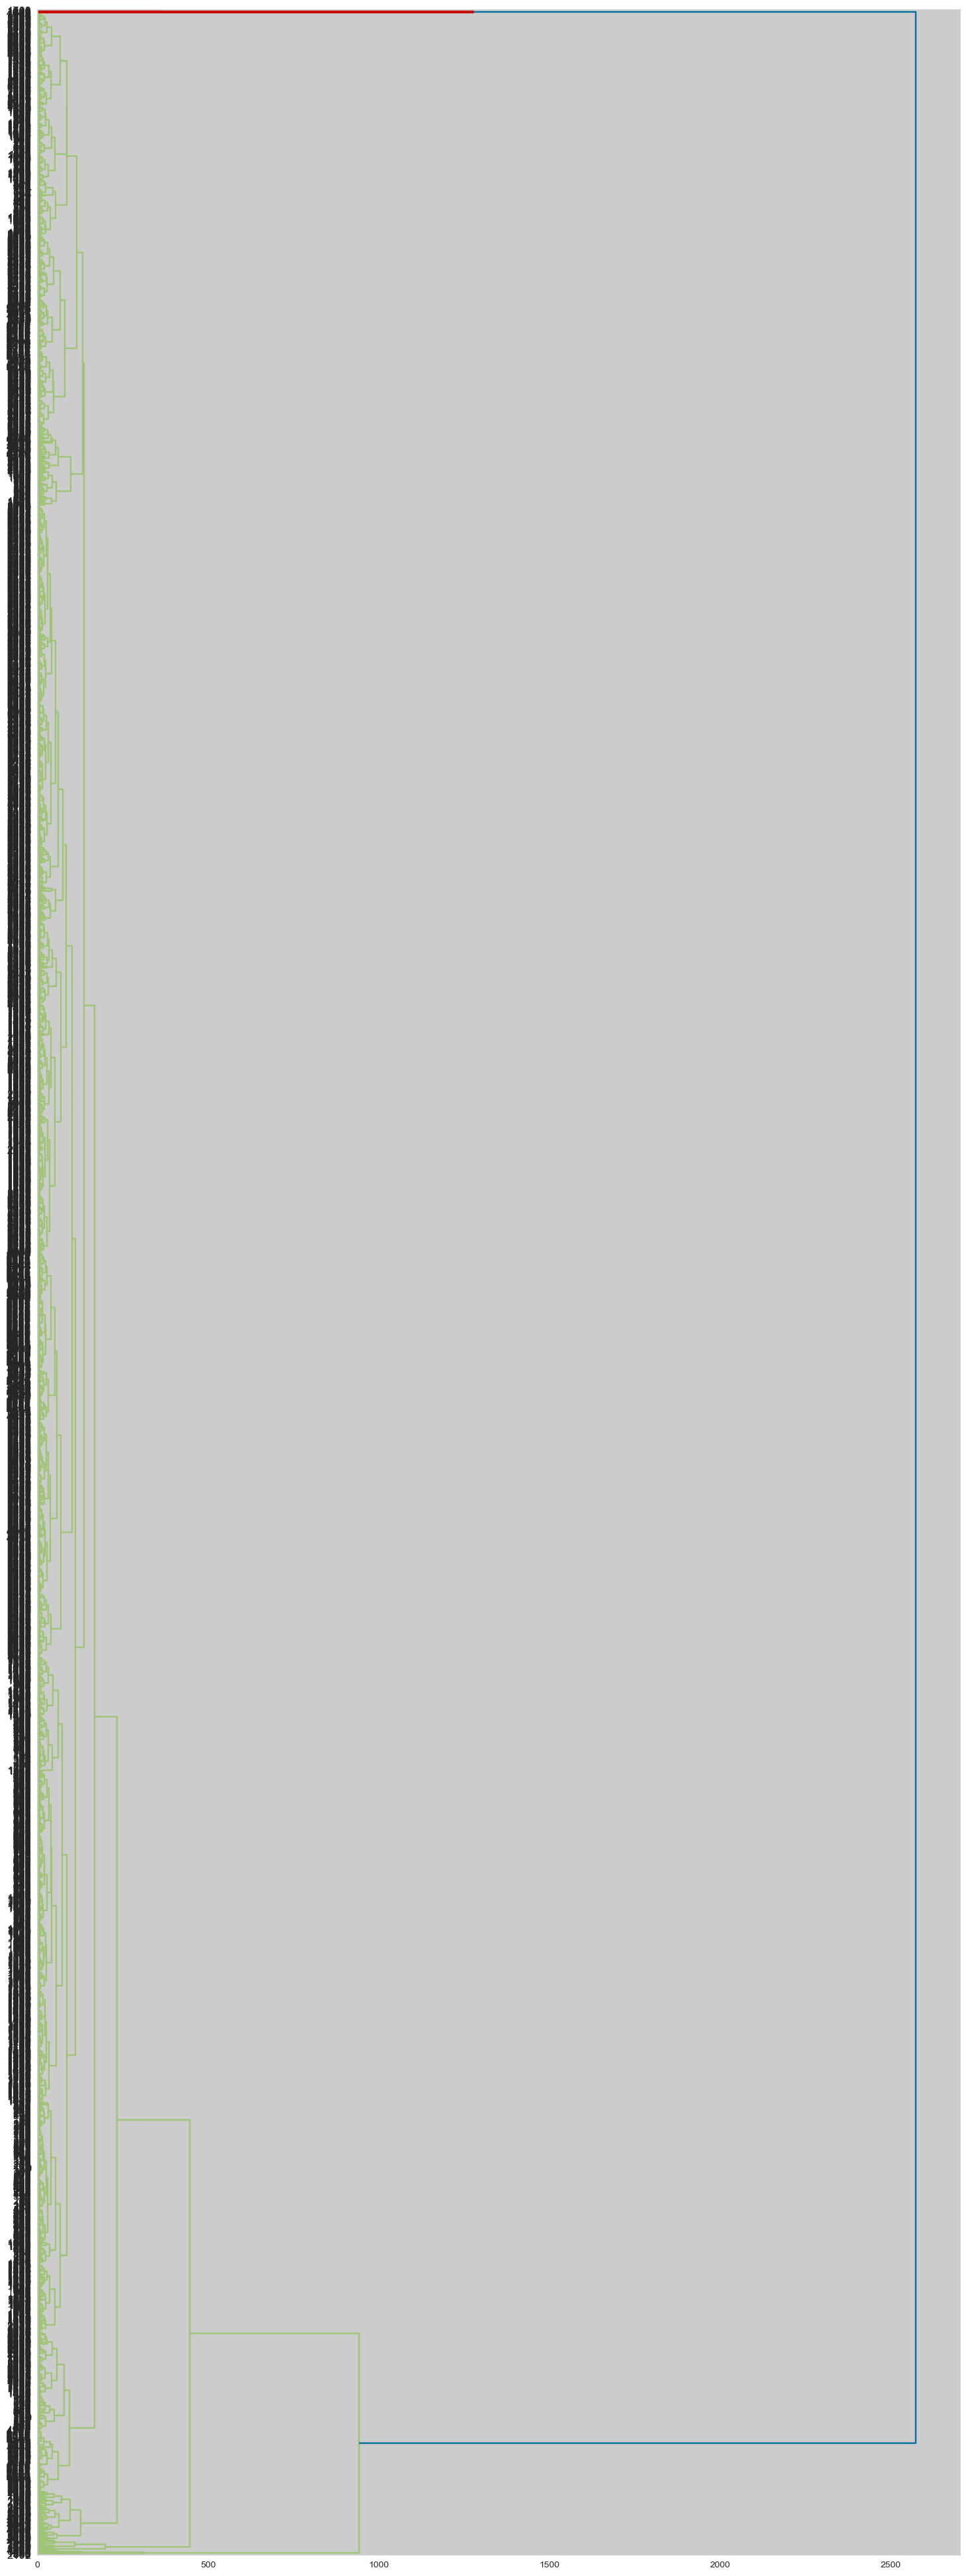

In [196]:
plt.figure(figsize=(18, 50))
dendro = hierarchy.dendrogram(Z, leaf_rotation=0, leaf_font_size=12, orientation='right')

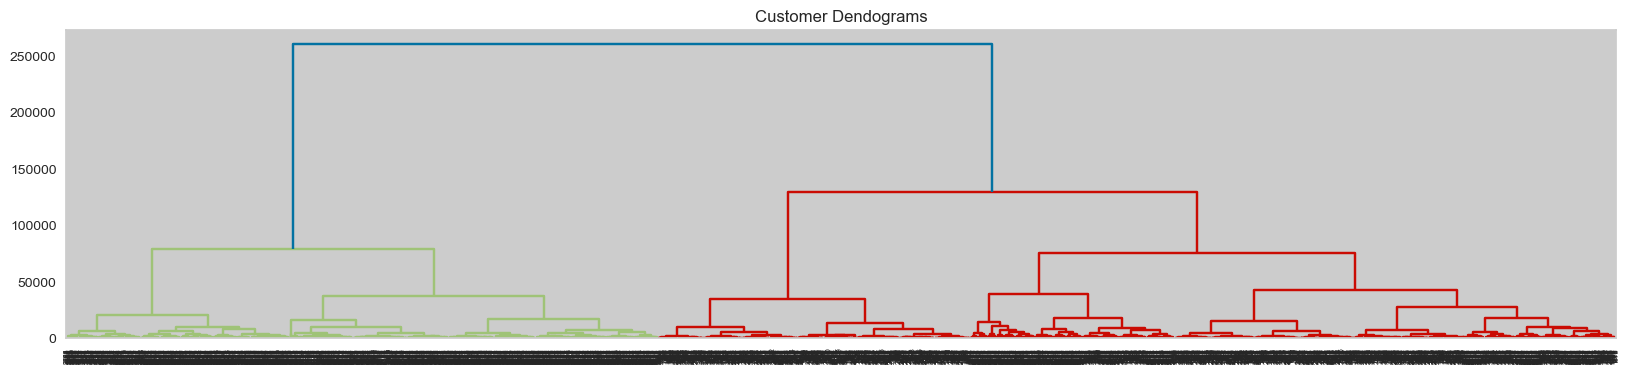

In [197]:
import scipy.cluster.hierarchy as shc

plt.figure(figsize=(20, 4))
plt.title("Customer Dendograms")
dend = shc.dendrogram(shc.linkage(Z, method='ward',metric='euclidean')) #ward = minimum of variance